# Spark基础教程

Spark是一个快速和通用的大数据引擎，可以通俗的理解成一个分布式的大数据处理框架，允许用户将Spark部署在大量廉价的硬件之上，形成集群。Spark使用scala 实现，提供了 JAVA, Python，R等语言的调用接口。在本次学习我们将学习如何使用Spark清洗数据，并进行基础的特征工程操作，帮助大家掌握基础PySpark技能。

学习资料：

https://spark.apache.org/docs/latest/quick-start.html

https://spark.apache.org/docs/latest/sql-programming-guide.html

https://github.com/apache/spark/tree/4f25b3f712/examples/src/main/python

https://sparkbyexamples.com/pyspark-tutorial/

https://www.tutorialspoint.com/pyspark/index.htm

## 任务1：PySpark数据处理

- 步骤1：使用Python链接Spark环境
- 步骤2：创建dateframe数据
- 步骤3：用spark执行以下逻辑：找到数据行数、列数
- 步骤4：用spark筛选class为1的样本
- 步骤5：用spark筛选language >90 或 math> 90的样本

### 步骤1：使用Python链接Spark环境

In [1]:
# # 添加此代码，进行spark初始化
# import findspark
# findspark.init()

In [2]:
# 导入相关库
import pandas as pd
from pyspark.sql import SparkSession

In [3]:
# 连接Spark
spark = SparkSession \
    .builder \
    .appName('pyspark') \
    .getOrCreate()


### 步骤2：创建dateframe数据

In [4]:
# 创建原始数据 
test = spark.createDataFrame([('001','1',100,87,67,83,98), ('002','2',87,81,90,83,83), ('003','3',86,91,83,89,63),
                                ('004','2',65,87,94,73,88), ('005','1',76,62,89,81,98), ('006','3',84,82,85,73,99),
                                ('007','3',56,76,63,72,87), ('008','1',55,62,46,78,71), ('009','2',63,72,87,98,64)],
                            ['number','class','language','math','english','physic','chemical'])
# 展示结果
test.show()

+------+-----+--------+----+-------+------+--------+
|number|class|language|math|english|physic|chemical|
+------+-----+--------+----+-------+------+--------+
|   001|    1|     100|  87|     67|    83|      98|
|   002|    2|      87|  81|     90|    83|      83|
|   003|    3|      86|  91|     83|    89|      63|
|   004|    2|      65|  87|     94|    73|      88|
|   005|    1|      76|  62|     89|    81|      98|
|   006|    3|      84|  82|     85|    73|      99|
|   007|    3|      56|  76|     63|    72|      87|
|   008|    1|      55|  62|     46|    78|      71|
|   009|    2|      63|  72|     87|    98|      64|
+------+-----+--------+----+-------+------+--------+



### 步骤3：用spark执行以下逻辑：找到数据行数、列数

In [5]:
# 统计行数
print(f'行数:{test.count()}')

# 统计列数
print(f'列数:{len(test.columns)}')

行数:9
列数:7


### 步骤4：用spark筛选class为1的样本

In [6]:
# 使用fliter过滤样本
test.filter(test['class'] == '1').show()

+------+-----+--------+----+-------+------+--------+
|number|class|language|math|english|physic|chemical|
+------+-----+--------+----+-------+------+--------+
|   001|    1|     100|  87|     67|    83|      98|
|   005|    1|      76|  62|     89|    81|      98|
|   008|    1|      55|  62|     46|    78|      71|
+------+-----+--------+----+-------+------+--------+



### 步骤5：用spark筛选language >90 或 math> 90的样本

In [7]:
# 过滤条件
f1 = test['language'] > 90
f2 = test['math'] > 90

# 使用fliter过滤样本
test.filter(f1|f2).show()

+------+-----+--------+----+-------+------+--------+
|number|class|language|math|english|physic|chemical|
+------+-----+--------+----+-------+------+--------+
|   001|    1|     100|  87|     67|    83|      98|
|   003|    3|      86|  91|     83|    89|      63|
+------+-----+--------+----+-------+------+--------+



## 任务2：PySpark数据统计

- 步骤1：读取文件https://cdn.coggle.club/Pokemon.csv
- 步骤2：将读取的进行保存，表头也需要保存
- 步骤3：分析每列的类型，取值个数
- 步骤4：分析每列是否包含缺失值

### 步骤1：读取文件

文件链接：https://cdn.coggle.club/Pokemon.csv

In [8]:
from pyspark import SparkFiles

# 从url读取数据
spark.sparkContext.addFile('https://cdn.coggle.club/Pokemon.csv')
df = spark.read.csv("file:///"+SparkFiles.get("Pokemon.csv"), header=True, inferSchema= True)
df = df.withColumnRenamed('Sp. Atk', 'Sp Atk')
df = df.withColumnRenamed('Sp. Def', 'Sp Def')

In [9]:
df.show(5)

+--------------------+------+------+-----+---+------+-------+------+------+-----+----------+---------+
|                Name|Type 1|Type 2|Total| HP|Attack|Defense|Sp Atk|Sp Def|Speed|Generation|Legendary|
+--------------------+------+------+-----+---+------+-------+------+------+-----+----------+---------+
|           Bulbasaur| Grass|Poison|  318| 45|    49|     49|    65|    65|   45|         1|    false|
|             Ivysaur| Grass|Poison|  405| 60|    62|     63|    80|    80|   60|         1|    false|
|            Venusaur| Grass|Poison|  525| 80|    82|     83|   100|   100|   80|         1|    false|
|VenusaurMega Venu...| Grass|Poison|  625| 80|   100|    123|   122|   120|   80|         1|    false|
|          Charmander|  Fire|  null|  309| 39|    52|     43|    60|    50|   65|         1|    false|
+--------------------+------+------+-----+---+------+-------+------+------+-----+----------+---------+
only showing top 5 rows



### 步骤2：将读取的进行保存，表头也需要保存

In [10]:
# 将数据进行保存
df.write.csv("./data/Pokemon.csv", header=True, mode="overwrite")      

### 步骤3：分析每列的类型，取值个数

In [11]:
# 每列类型
df.printSchema()    # df.dtypes

root
 |-- Name: string (nullable = true)
 |-- Type 1: string (nullable = true)
 |-- Type 2: string (nullable = true)
 |-- Total: integer (nullable = true)
 |-- HP: integer (nullable = true)
 |-- Attack: integer (nullable = true)
 |-- Defense: integer (nullable = true)
 |-- Sp Atk: integer (nullable = true)
 |-- Sp Def: integer (nullable = true)
 |-- Speed: integer (nullable = true)
 |-- Generation: integer (nullable = true)
 |-- Legendary: boolean (nullable = true)



In [12]:
import pyspark.sql.functions as fn

# 统计各列取值个数
df.agg(*[(fn.count_distinct(c)).alias(c+'_num') for c in df.columns]).show()

+--------+----------+----------+---------+------+----------+-----------+----------+----------+---------+--------------+-------------+
|Name_num|Type 1_num|Type 2_num|Total_num|HP_num|Attack_num|Defense_num|Sp Atk_num|Sp Def_num|Speed_num|Generation_num|Legendary_num|
+--------+----------+----------+---------+------+----------+-----------+----------+----------+---------+--------------+-------------+
|     799|        18|        18|      200|    94|       111|        103|       105|        92|      108|             6|            2|
+--------+----------+----------+---------+------+----------+-----------+----------+----------+---------+--------------+-------------+



### 步骤4：分析每列是否包含缺失值

In [13]:
# 统计各列缺失值数量
df.agg(*[(fn.count('*') - fn.count(c)).alias(c+'_null') for c in df.columns]).show()

+---------+-----------+-----------+----------+-------+-----------+------------+-----------+-----------+----------+---------------+--------------+
|Name_null|Type 1_null|Type 2_null|Total_null|HP_null|Attack_null|Defense_null|Sp Atk_null|Sp Def_null|Speed_null|Generation_null|Legendary_null|
+---------+-----------+-----------+----------+-------+-----------+------------+-----------+-----------+----------+---------------+--------------+
|        0|          0|        386|         0|      0|          0|           0|          0|          0|         0|              0|             0|
+---------+-----------+-----------+----------+-------+-----------+------------+-----------+-----------+----------+---------------+--------------+



## 任务3：PySpark分组聚合

- 步骤1：读取文件https://cdn.coggle.club/Pokemon.csv
- 步骤2：学习groupby分组聚合的使用
- 步骤3：学习agg分组聚合的使用
- 步骤4：学习transform的使用
- 步骤5：使用groupby、agg、transform，统计数据在Type 1分组下 HP的均值

### 步骤1：读取文件

In [14]:
# from pyspark import SparkFiles

# # 从url读取数据
# spark.sparkContext.addFile('https://cdn.coggle.club/Pokemon.csv')
# df = spark.read.csv("file:///"+SparkFiles.get("Pokemon.csv"), header=True, inferSchema= True)
# df = df.withColumnRenamed('Sp. Atk', 'Sp Atk')
# df = df.withColumnRenamed('Sp. Def', 'Sp Def')

df.show(5)

+--------------------+------+------+-----+---+------+-------+------+------+-----+----------+---------+
|                Name|Type 1|Type 2|Total| HP|Attack|Defense|Sp Atk|Sp Def|Speed|Generation|Legendary|
+--------------------+------+------+-----+---+------+-------+------+------+-----+----------+---------+
|           Bulbasaur| Grass|Poison|  318| 45|    49|     49|    65|    65|   45|         1|    false|
|             Ivysaur| Grass|Poison|  405| 60|    62|     63|    80|    80|   60|         1|    false|
|            Venusaur| Grass|Poison|  525| 80|    82|     83|   100|   100|   80|         1|    false|
|VenusaurMega Venu...| Grass|Poison|  625| 80|   100|    123|   122|   120|   80|         1|    false|
|          Charmander|  Fire|  null|  309| 39|    52|     43|    60|    50|   65|         1|    false|
+--------------------+------+------+-----+---+------+-------+------+------+-----+----------+---------+
only showing top 5 rows



### 步骤2：学习groupby分组聚合的使用

https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.groupBy.html#pyspark.sql.DataFrame.groupBy

### 步骤3：学习agg分组聚合的使用

https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.GroupedData.agg.html#pyspark.sql.GroupedData.agg

### 步骤4：学习transform的使用

https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.functions.transform.html

### 步骤5：使用groupby、agg、transform，统计数据在Type 1分组下 HP的均值

In [15]:
# 分组统计
# df.groupBy('Type 1').avg('HP').show()  # df.groupBy('Type 1').mean('HP').show()
df.groupBy('Type 1').agg({'HP':'mean'}).show()

+--------+-----------------+
|  Type 1|          avg(HP)|
+--------+-----------------+
|   Water|          72.0625|
|  Poison|            67.25|
|   Steel|65.22222222222223|
|    Rock|65.36363636363636|
|     Ice|             72.0|
|   Ghost|          64.4375|
|   Fairy|74.11764705882354|
| Psychic|70.63157894736842|
|  Dragon|          83.3125|
|  Flying|            70.75|
|     Bug|56.88405797101449|
|Electric|59.79545454545455|
|    Fire|69.90384615384616|
|  Ground|         73.78125|
|    Dark|66.80645161290323|
|Fighting|69.85185185185185|
|   Grass|67.27142857142857|
|  Normal|77.27551020408163|
+--------+-----------------+



## 任务4：SparkSQL基础语法

- 步骤1：使用Spark SQL完成任务1里面的数据筛选
- 步骤2：使用Spark SQL完成任务2里面的统计（列可以不统计）
- 步骤3：使用Spark SQL完成任务3的分组统计

### 步骤1：使用Spark SQL完成任务1里面的数据筛选

筛选test数据集中 language>90 或 math>90 的样本

In [16]:
# 1.SQL风格
test.createOrReplaceTempView("test")    # 注册临时表
spark.sql("SELECT * FROM test WHERE language>90 or math>90").show()

# # 2.DSL风格——领域特定语言
# test.where("language>90 or math>90").show()
# test.filter("language>90 or math>90").show()

+------+-----+--------+----+-------+------+--------+
|number|class|language|math|english|physic|chemical|
+------+-----+--------+----+-------+------+--------+
|   001|    1|     100|  87|     67|    83|      98|
|   003|    3|      86|  91|     83|    89|      63|
+------+-----+--------+----+-------+------+--------+



### 步骤2：使用Spark SQL完成任务2里面的统计（列可以不统计）

统计各列缺失值个数

In [17]:
# 1. SQL风格——以某列为例
df.createOrReplaceTempView("pokemon")   # 将DataFrame注册为临时表，如果存在进行替换
spark.sql("SELECT SUM(CASE WHEN `Type 2` IS NULL THEN 1 END) AS `Type 2_missing` FROM pokemon").show()

# # 2.DSL风格
# df.agg(*[(fn.count('*') - fn.count(c)).alias(c+'_null') for c in df.columns]).show()

+--------------+
|Type 2_missing|
+--------------+
|           386|
+--------------+



### 步骤3：使用Spark SQL完成任务3的分组统计

In [18]:
# 1.SQL风格
spark.sql("SELECT `Type 1`, AVG(HP) FROM pokemon GROUP BY `Type 1` ").show()

# # 2.DSL风格
# df.groupBy('Type 1').agg({'HP':'mean'}).show()

+--------+-----------------+
|  Type 1|          avg(HP)|
+--------+-----------------+
|   Water|          72.0625|
|  Poison|            67.25|
|   Steel|65.22222222222223|
|    Rock|65.36363636363636|
|     Ice|             72.0|
|   Ghost|          64.4375|
|   Fairy|74.11764705882354|
| Psychic|70.63157894736842|
|  Dragon|          83.3125|
|  Flying|            70.75|
|     Bug|56.88405797101449|
|Electric|59.79545454545455|
|    Fire|69.90384615384616|
|  Ground|         73.78125|
|    Dark|66.80645161290323|
|Fighting|69.85185185185185|
|   Grass|67.27142857142857|
|  Normal|77.27551020408163|
+--------+-----------------+



## 任务5：SparkML基础：数据编码

- 步骤1：学习Spark ML中数据编码模块
- 步骤2：读取文件Pokemon.csv，理解数据字段含义
- 步骤3：将其中的类别属性使用onehotencoder
- 步骤4：对其中的数值属性字段使用minmaxscaler
- 步骤5：对编码后的属性使用pca进行降维（维度可以自己选择）

### 步骤1：学习Spark ML中数据编码模块

https://spark.apache.org/docs/latest/api/python/reference/pyspark.ml.html#feature

https://spark.apache.org/docs/latest/ml-features.html

### 步骤2：读取文件Pokemon.csv，理解数据字段含义

In [19]:
# from pyspark import SparkFiles

# # 从url读取数据
# spark.sparkContext.addFile('https://cdn.coggle.club/Pokemon.csv')
# df = spark.read.csv("file:///"+SparkFiles.get("Pokemon.csv"), header=True, inferSchema= True)
# df = df.withColumnRenamed('Sp. Atk', 'Sp Atk')
# df = df.withColumnRenamed('Sp. Def', 'Sp Def')

df.show(5)

+--------------------+------+------+-----+---+------+-------+------+------+-----+----------+---------+
|                Name|Type 1|Type 2|Total| HP|Attack|Defense|Sp Atk|Sp Def|Speed|Generation|Legendary|
+--------------------+------+------+-----+---+------+-------+------+------+-----+----------+---------+
|           Bulbasaur| Grass|Poison|  318| 45|    49|     49|    65|    65|   45|         1|    false|
|             Ivysaur| Grass|Poison|  405| 60|    62|     63|    80|    80|   60|         1|    false|
|            Venusaur| Grass|Poison|  525| 80|    82|     83|   100|   100|   80|         1|    false|
|VenusaurMega Venu...| Grass|Poison|  625| 80|   100|    123|   122|   120|   80|         1|    false|
|          Charmander|  Fire|  null|  309| 39|    52|     43|    60|    50|   65|         1|    false|
+--------------------+------+------+-----+---+------+-------+------+------+-----+----------+---------+
only showing top 5 rows



### 步骤3：将其中的类别属性使用onehotencoder

In [20]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# 由于OneHotEncoder不支持string类型，得先对特征进行索引化
stringIndexer = StringIndexer(inputCols=['Type 1', 'Type 2'],
                            outputCols=['Type1_index', 'Type2_index'],
                            stringOrderType='frequencyDesc')
indexed = stringIndexer.setHandleInvalid("keep").fit(df).transform(df)

# OneHot编码
onehotEncoder = OneHotEncoder(inputCols=['Type1_index', 'Type2_index', 'Generation'],
                        outputCols=['Type1Vec', 'Type2Vec', 'GenerationVec'])
encoded = onehotEncoder.fit(indexed).transform(indexed)

encoded.select(['Name', 'Type 1', 'Type 2', 'Generation', 'Type1Vec', 'Type2Vec', 'GenerationVec']).show(5)

+--------------------+------+------+----------+--------------+--------------+-------------+
|                Name|Type 1|Type 2|Generation|      Type1Vec|      Type2Vec|GenerationVec|
+--------------------+------+------+----------+--------------+--------------+-------------+
|           Bulbasaur| Grass|Poison|         1|(18,[2],[1.0])|(18,[2],[1.0])|(6,[1],[1.0])|
|             Ivysaur| Grass|Poison|         1|(18,[2],[1.0])|(18,[2],[1.0])|(6,[1],[1.0])|
|            Venusaur| Grass|Poison|         1|(18,[2],[1.0])|(18,[2],[1.0])|(6,[1],[1.0])|
|VenusaurMega Venu...| Grass|Poison|         1|(18,[2],[1.0])|(18,[2],[1.0])|(6,[1],[1.0])|
|          Charmander|  Fire|  null|         1|(18,[5],[1.0])|    (18,[],[])|(6,[1],[1.0])|
+--------------------+------+------+----------+--------------+--------------+-------------+
only showing top 5 rows



### 步骤4：对其中的数值属性字段使用minmaxscaler

In [21]:
# 由于MinMaxScalar只能对单行进行归一化，因此要利用Pipeline来对转换列表内的每个属性进行转换
from pyspark.ml.feature import MinMaxScaler, VectorAssembler
from pyspark.ml import Pipeline

columns_to_scale = ['Total', 'HP', 'Attack', 'Defense', 'Sp Atk', 'Sp Def', 'Speed']
# 向量化要转换的属性
assemblers = [VectorAssembler(inputCols=[col], outputCol=col+'_vec') for col in columns_to_scale]
scalers = [MinMaxScaler(inputCol=col+'_vec', outputCol=col+'_scaled') for col in columns_to_scale]
# 定义管道
pipeline = Pipeline(stages=assemblers+scalers)
scaledDf = pipeline.fit(encoded).transform(encoded)

scaledDf.select(['Name', 'Total_scaled', 'HP_scaled', 'Attack_scaled', 'Defense_scaled', 'Sp Atk_scaled', 'Sp Def_scaled', 'Speed_scaled']).show(5)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                Name|        Total_scaled|           HP_scaled|       Attack_scaled|      Defense_scaled|       Sp Atk_scaled|       Sp Def_scaled|        Speed_scaled|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|           Bulbasaur|              [0.23]|[0.1732283464566929]|[0.23783783783783...|[0.19555555555555...|[0.29891304347826...|[0.2142857142857143]|[0.22857142857142...|
|             Ivysaur|             [0.375]|[0.23228346456692...|[0.3081081081081081]|[0.2577777777777778]|[0.3804347826086956]|[0.28571428571428...|[0.3142857142857143]|
|            Venusaur|[0.5750000000000001]|[0.3110236220472441]|[0.41621621621621...|[0.3466666666666667]|[0.4891304347826087]| [0.380952380952381]|[0

### 步骤5：对编码后的属性使用pca进行降维（维度可以自己选择）

In [22]:
from pyspark.ml.feature import PCA 

# 利用降维后的种族值做PCA主成分分析
columns_to_pca = ['Total_scaled', 'HP_scaled', 'Attack_scaled', 'Defense_scaled', 'Sp Atk_scaled', 'Sp Def_scaled', 'Speed_scaled']
# 将需要处理的变量以向量形式表示
vecAssembler = VectorAssembler(inputCols=columns_to_pca, outputCol='vector_to_pca')
pcaDf = vecAssembler.transform(scaledDf)
# PCA主成分分析
pcaModel = PCA(k=2, inputCol='vector_to_pca', outputCol='pcaed_vector')
pcaedDf = pcaModel.fit(pcaDf).transform(pcaDf)

pcaedDf.select(['Name', 'pcaed_vector']).show(5)

+--------------------+--------------------+
|                Name|        pcaed_vector|
+--------------------+--------------------+
|           Bulbasaur|[-0.5779908488663...|
|             Ivysaur|[-0.8036261416372...|
|            Venusaur|[-1.1159009089467...|
|VenusaurMega Venu...|[-1.3790872076314...|
|          Charmander|[-0.5695573835440...|
+--------------------+--------------------+
only showing top 5 rows



## 任务6：SparkML基础：分类模型

- 步骤1：继续任务5的步骤，假设Type 1为标签，将其进行labelencoder
- 步骤2：导入合适的标签评价指标，说出选择的原因？
- 步骤3：选择至少3种分类方法，完成训练。

### 步骤1：继续任务5的步骤，假设Type 1为标签，将其进行labelencoder

In [23]:
# 之前已经通过StringEncoder转换为标签
pcaedDf.select('Type1_index').show(5)

+-----------+
|Type1_index|
+-----------+
|        2.0|
|        2.0|
|        2.0|
|        2.0|
|        5.0|
+-----------+
only showing top 5 rows



### 步骤2：导入合适的标签评价指标，说出选择的原因？

选择使用的标签评价指标是：准确率（Accuracy），因为能够最直观展示模型的效果。

In [24]:
# 导入相关库
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

### 步骤3：选择至少3种分类方法，完成训练。

In [25]:
# 用于训练的数据集
data_set = pcaedDf.select(['Type1_index', 'pcaed_vector', 'vector_to_pca'])
# 划分训练集和测试集
train_df, test_df = data_set.randomSplit([0.75, 0.25], seed=2022)
# 展示训练集和测试集容量
print(f'训练集：({train_df.count()}, {len(train_df.columns)})')
print(f'测试集：({test_df.count()}, {len(test_df.columns)})')

训练集：(607, 3)
测试集：(193, 3)


逻辑回归（Logistic Regression）

In [26]:
from pyspark.ml.classification import LogisticRegression

# 构建模型
logi_model = LogisticRegression(featuresCol='pcaed_vector', labelCol='Type1_index').fit(train_df)
# 预测结果
train_result_logi = logi_model.evaluate(train_df).predictions
test_result_logi = logi_model.evaluate(test_df).predictions

test_result_logi.show(5)

C:\Users\wengz\anaconda3\lib\pyspark\sql\context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+-----------+--------------------+--------------------+--------------------+--------------------+----------+
|Type1_index|        pcaed_vector|       vector_to_pca|       rawPrediction|         probability|prediction|
+-----------+--------------------+--------------------+--------------------+--------------------+----------+
|        0.0|[-1.5643373790201...|[0.83333333333333...|[1.82187011299118...|[0.10250281517390...|       8.0|
|        0.0|[-1.5144079854545...|[0.81666666666666...|[1.83790554968661...|[0.10855677053307...|       4.0|
|        0.0|[-1.2820243706233...|[0.63333333333333...|[1.89809165873014...|[0.11458183706839...|       4.0|
|        0.0|[-1.2337665270258...|[0.68333333333333...|[1.98460479629409...|[0.07894981842175...|      14.0|
|        0.0|[-1.1721366811238...|[0.58333333333333...|[1.91438752031794...|[0.08969628188617...|       4.0|
+-----------+--------------------+--------------------+--------------------+--------------------+----------+
only showing top 5 

In [27]:
# 结果评估
accu_train_logi = MulticlassClassificationEvaluator(labelCol='Type1_index').evaluate(train_result_logi)
accu_test_logi = MulticlassClassificationEvaluator(labelCol='Type1_index').evaluate(test_result_logi)

print(f"训练集预测准确率：{accu_train_logi:.2%}\n测试集预测准确率：{accu_test_logi:.2%}")

训练集预测准确率：13.23%
测试集预测准确率：14.91%


决策树（Decision Trees）

In [28]:
from pyspark.ml.classification import DecisionTreeClassifier

# 构建模型
dt_model = DecisionTreeClassifier(maxDepth=5, featuresCol='pcaed_vector', labelCol='Type1_index').fit(train_df)
# 预测结果
train_result_dt = dt_model.transform(train_df)
test_result_dt = dt_model.transform(test_df)

test_result_dt.show(5)

+-----------+--------------------+--------------------+--------------------+--------------------+----------+
|Type1_index|        pcaed_vector|       vector_to_pca|       rawPrediction|         probability|prediction|
+-----------+--------------------+--------------------+--------------------+--------------------+----------+
|        0.0|[-1.5643373790201...|[0.83333333333333...|[6.0,5.0,3.0,1.0,...|[0.1,0.0833333333...|       8.0|
|        0.0|[-1.5144079854545...|[0.81666666666666...|[6.0,5.0,3.0,1.0,...|[0.1,0.0833333333...|       8.0|
|        0.0|[-1.2820243706233...|[0.63333333333333...|[9.0,11.0,4.0,4.0...|[0.12676056338028...|       5.0|
|        0.0|[-1.2337665270258...|[0.68333333333333...|[0.0,0.0,0.0,2.0,...|[0.0,0.0,0.0,0.33...|      14.0|
|        0.0|[-1.1721366811238...|[0.58333333333333...|[0.0,2.0,1.0,3.0,...|[0.0,0.125,0.0625...|       6.0|
+-----------+--------------------+--------------------+--------------------+--------------------+----------+
only showing top 5 

In [29]:
# 结果评估
accu_train_dt = MulticlassClassificationEvaluator(labelCol='Type1_index').evaluate(train_result_dt)
accu_test_dt = MulticlassClassificationEvaluator(labelCol='Type1_index').evaluate(test_result_dt)

print(f"训练集预测准确率：{accu_train_dt:.2%}\n测试集预测准确率：{accu_test_dt:.2%}")

训练集预测准确率：20.07%
测试集预测准确率：15.80%


随机森林(Random Forest)

In [30]:
from pyspark.ml.classification import RandomForestClassifier

# 构建模型
rf_model = RandomForestClassifier(maxDepth=5, featuresCol='pcaed_vector', labelCol='Type1_index').fit(train_df)
# 预测结果
train_result_rf = rf_model.transform(train_df)
test_result_rf = rf_model.transform(test_df)

test_result_rf.show(5)

+-----------+--------------------+--------------------+--------------------+--------------------+----------+
|Type1_index|        pcaed_vector|       vector_to_pca|       rawPrediction|         probability|prediction|
+-----------+--------------------+--------------------+--------------------+--------------------+----------+
|        0.0|[-1.5643373790201...|[0.83333333333333...|[1.27372288099372...|[0.06368614404968...|       8.0|
|        0.0|[-1.5144079854545...|[0.81666666666666...|[1.27372288099372...|[0.06368614404968...|       8.0|
|        0.0|[-1.2820243706233...|[0.63333333333333...|[2.07797424005050...|[0.10389871200252...|       5.0|
|        0.0|[-1.2337665270258...|[0.68333333333333...|[0.71468457311236...|[0.03573422865561...|      14.0|
|        0.0|[-1.1721366811238...|[0.58333333333333...|[0.86993586690458...|[0.04349679334522...|      11.0|
+-----------+--------------------+--------------------+--------------------+--------------------+----------+
only showing top 5 

In [31]:
# 结果评估
accu_train_rf = MulticlassClassificationEvaluator(labelCol='Type1_index').evaluate(train_result_rf)
accu_test_rf = MulticlassClassificationEvaluator(labelCol='Type1_index').evaluate(test_result_rf)

print(f"训练集预测准确率：{accu_train_rf:.2%}\n测试集预测准确率：{accu_test_rf:.2%}")

训练集预测准确率：29.73%
测试集预测准确率：14.66%


朴素贝叶斯（Naive Bayes）

In [32]:
from pyspark.ml.classification import NaiveBayes
# 构建模型
bayes_model = NaiveBayes(smoothing=1.0, featuresCol='vector_to_pca', labelCol='Type1_index', modelType='multinomial').fit(train_df)
# 预测结果
train_result_bayes = bayes_model.transform(train_df)
test_result_bayes = bayes_model.transform(test_df)

test_result_bayes.show(5)

+-----------+--------------------+--------------------+--------------------+--------------------+----------+
|Type1_index|        pcaed_vector|       vector_to_pca|       rawPrediction|         probability|prediction|
+-----------+--------------------+--------------------+--------------------+--------------------+----------+
|        0.0|[-1.5643373790201...|[0.83333333333333...|[-9.7607238618814...|[0.13189059172286...|       0.0|
|        0.0|[-1.5144079854545...|[0.81666666666666...|[-9.6392469119504...|[0.13153579197242...|       0.0|
|        0.0|[-1.2820243706233...|[0.63333333333333...|[-8.2230245952990...|[0.13073681400775...|       0.0|
|        0.0|[-1.2337665270258...|[0.68333333333333...|[-8.4232867450927...|[0.13386207166064...|       0.0|
|        0.0|[-1.1721366811238...|[0.58333333333333...|[-7.8646584468633...|[0.13059304731829...|       0.0|
+-----------+--------------------+--------------------+--------------------+--------------------+----------+
only showing top 5 

In [33]:
# 结果评估
accu_train_bayes = MulticlassClassificationEvaluator(labelCol='Type1_index').evaluate(train_result_bayes)
accu_test_bayes = MulticlassClassificationEvaluator(labelCol='Type1_index').evaluate(test_result_bayes)

print(f"训练集预测准确率：{accu_train_bayes:.2%}\n测试集预测准确率：{accu_test_bayes:.2%}")

训练集预测准确率：8.83%
测试集预测准确率：9.39%


## 任务7：SparkML基础：聚类模型

- 步骤1：继续任务5的步骤，假设Type 1为标签，将其进行labelencoder
- 步骤2：使用kmeans对宝可梦进行聚类，使用肘部法选择合适聚类个数。

### 步骤1：继续任务5的步骤，假设Type 1为标签，将其进行labelencoder

In [34]:
# 之前已经通过StringEncoder转换为标签
pcaedDf.select('Type1_index').show(5)

+-----------+
|Type1_index|
+-----------+
|        2.0|
|        2.0|
|        2.0|
|        2.0|
|        5.0|
+-----------+
only showing top 5 rows



### 步骤2：使用kmeans对宝可梦进行聚类，使用肘部法选择合适聚类个数。

In [35]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# 根据不同K值进行聚类
errors = []
silhouettes = []
for k in range(2, 10):
    kmeans_model = KMeans(featuresCol='pcaed_vector', k=k, seed=2022).fit(data_set)
    kmeans_results = kmeans_model.transform(data_set)
    # 簇内误方差
    error = kmeans_model.summary.trainingCost
    # 轮廓系数
    silhouette = ClusteringEvaluator(predictionCol='prediction', featuresCol='pcaed_vector', metricName='silhouette').evaluate(kmeans_results)
    errors.append(error)
    silhouettes.append(silhouette)

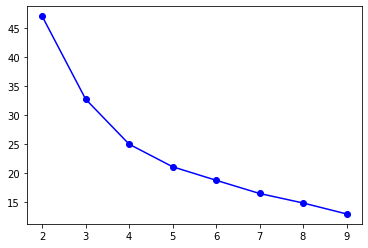

In [36]:
# 作图根据肘部原则选择 K = 4or5
import matplotlib.pyplot as plt 
import numpy as np

x = np.arange(2, 10)
plt.plot(x, errors, 'o-', color='blue');

## 任务8：Spark RDD

- 步骤1：学习资料
- 步骤2：使用RDD functions完成任务2的统计逻辑。

### 步骤1：学习资料

https://spark.apache.org/docs/latest/rdd-programming-guide.html#basics

### 步骤2：使用RDD functions完成任务2的统计逻辑。

In [37]:
# 将DataFrame格式数据转换为RDD格式
rdd = df.rdd

# 展示前5条数据
rdd.take(5)

[Row(Name='Bulbasaur', Type 1='Grass', Type 2='Poison', Total=318, HP=45, Attack=49, Defense=49, Sp Atk=65, Sp Def=65, Speed=45, Generation=1, Legendary=False),
 Row(Name='Ivysaur', Type 1='Grass', Type 2='Poison', Total=405, HP=60, Attack=62, Defense=63, Sp Atk=80, Sp Def=80, Speed=60, Generation=1, Legendary=False),
 Row(Name='Venusaur', Type 1='Grass', Type 2='Poison', Total=525, HP=80, Attack=82, Defense=83, Sp Atk=100, Sp Def=100, Speed=80, Generation=1, Legendary=False),
 Row(Name='VenusaurMega Venusaur', Type 1='Grass', Type 2='Poison', Total=625, HP=80, Attack=100, Defense=123, Sp Atk=122, Sp Def=120, Speed=80, Generation=1, Legendary=False),
 Row(Name='Charmander', Type 1='Fire', Type 2=None, Total=309, HP=39, Attack=52, Defense=43, Sp Atk=60, Sp Def=50, Speed=65, Generation=1, Legendary=False)]

In [38]:
# 统计每列的类型、取值个数、是否包含缺失值
columns = rdd.top(1)[0].asDict().keys()
list_col = []

for c in columns:
    # 类型
    type_c = type(rdd.top(1)[0][c])
    # 取值个数
    cnt = rdd.groupBy(lambda x: x[c]).count()
    # 缺失值个数
    cntNone = rdd.count() - rdd.filter(lambda x: x[c]).count()
    # 加到df里
    dict_c = {'列名':c, '类型':type_c, '取值个数':cnt, '缺失值个数':cntNone}
    # 加入列表
    list_col.append(dict_c)

df_des = pd.DataFrame(list_col)
df_des


,列名,类型,取值个数,缺失值个数
0,Name,<class 'str'>,799,0
1,Type 1,<class 'str'>,18,0
2,Type 2,<class 'str'>,19,386
3,Total,<class 'int'>,200,0
4,HP,<class 'int'>,94,0
5,Attack,<class 'int'>,111,0
6,Defense,<class 'int'>,103,0
7,Sp Atk,<class 'int'>,105,0
8,Sp Def,<class 'int'>,92,0
9,Speed,<class 'int'>,108,0


## 任务9：Spark Streaming

- 步骤1：学习资料
- 步骤2：读取文件
- 步骤3：使用filter筛选行不包含Grass的文本
- 步骤4：使用flatmap对文本行进行拆分

### 步骤1：学习资料

https://spark.apache.org/docs/latest/streaming-programming-guide.html

### 步骤2：读取文件

https://cdn.coggle.club/Pokemon.csv为textFileStream

In [39]:
# from pyspark.sql import SparkSession
# from pyspark.streaming import StreamingContext

# spark = SparkSession.builder.appName("CrossCorrelation").getOrCreate()
# ssc = StreamingContext(spark.sparkContext, 1)
# ds = ssc.textFileStream("./test_data/")

### 步骤3：使用filter筛选行不包含Grass的文本